<a href="https://colab.research.google.com/github/Harshpatel44/ML-A2/blob/master/A2-23-2-20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<b><h1><center>Assignment 2</h1></center></b>

In [0]:
## author: Harsh Patel ##

In [0]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import numpy as np
from numpy.random import default_rng
import time
rng = default_rng()

In [0]:
np.random.seed(0)

<center><h2><b>Part 1</h2></b></center>
<h3>(a) Creating the data set </h3> <h2>&</h2> <h3>(b) Adding noise function </h3>

below we create dataset 1 ( 2 clusters )

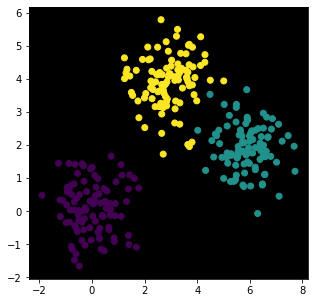

In [9]:
class data_set1:
  def __init__(self):
    self.cov1= [[0,0],[0,0]]  #covariance for class1
    self.cov2=[[0,0],[0,0]]   #covariance for class2   
    
    # method to adjust noise
  def noise(self,amt1,amt2=0):             
    n1=(3.5 - 0.4)*(amt1) + 0.4  #3.5 is max covariance and 0.4 is min covariance taken for noise
    self.cov1=[[n1,0],[0,n1]]
    if(amt2==0):
      amt2=amt1
    n2=(3.5 - 0.4)*(amt2) + 0.4
    self.cov2=[[n2,0],[0,n2]]
  #method to create data
  def create(self,n=2,items=100,noise=0):
    self.noise(noise,noise)
    self.n= n
    
    self.items= int(np.round(items/n))    # items per class =  all items / n 
    mx = rng.choice(int(self.n), size=self.n, replace=False)  # random x value of mean 
    my = rng.choice(int(self.n), size=self.n, replace=False)  # random y value of mean
    for i in range(self.n):
        if(i==0):
          x1, y1 = np.random.multivariate_normal([mx[i]*3,my[i]*2], self.cov1, self.items).T  #class1
          self.d1_data = np.array([x1,y1,np.zeros(x1.shape)+i])
        else:
          x2, y2 = np.random.multivariate_normal([mx[i]*3,my[i]*2], self.cov2, self.items).T  #class2
          self.d1_data=np.append(self.d1_data,[x2,y2,np.zeros(x1.shape)+i],axis=1)
    #appending both classes to 1 array and also adding another column of labels
    self.d1_data=self.d1_data.T
    return self.d1_data
  def plot(self):
    plt.figure(figsize=(5,5))
    plt.scatter(self.d1_data[:,0],self.d1_data[:,1],c=self.d1_data[:,2])
    
    ax = plt.gca()
    ax.set_facecolor('xkcd:salmon')
    ax.set_facecolor((0, 0, 0))
    #plt.axis([-6,6,-6,6])
    plt.show()

obj1=data_set1()
X=obj1.create(3,300,0.05)   #class,items,noise
np.random.shuffle(X)
obj1.plot()

<h5>1. In order to maintain uniform sampling, each class will have equal number of items even if not provided accordingly. For example we put number of items = 10 and class = 4, each class will have 2 items as items/class = 2. <br>
2. Dataset_1 is generated as plotted above ( with noise = 5 % ). Noise can be increased by changing the covariance. <br>
3. Covariance for which noise = 0 % (plotted above) is [ [ 0.4,0 ] , [ 0,0.4 ] ] for both classes.<br>
4. As increasing value of covariance increases noise, range of noise taken is from 0.4 to 3.5.
</h5>

Now we create dataset 2 ( concetric circles dataset)

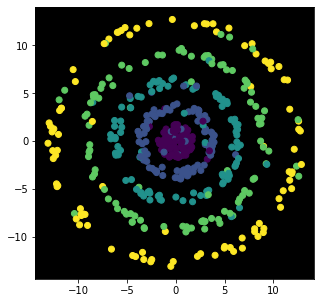

In [10]:
class data_set2:
  def circle_generation(self,items=130,n=50):
      r_factor=1
      self.n =n
      self.items = int(np.round(items / n))    # uniform sampling
      for i in range(n):
          r_factor+=1
          if i ==0:
              #circle inner most
              a=np.random.random(self.items) * 2 * np.pi
              r = r_factor * np.sqrt(0.8*np.random.random(self.items)+i)
              self.x1 = r * np.cos(a)
              self.y1 = r * np.sin(a)
              self.d2_data=np.array([self.x1,self.y1,np.zeros(self.x1.shape)+i])
          else:
              #outer circles
              a=np.random.random(self.items) * 2 * np.pi
              r = r_factor * (np.sqrt(0.8*np.random.random(self.items)+i))
              self.x2 = r * np.cos(a) 
              self.y2 = r * np.sin(a)
              #creating an array with both classes and with labels
              self.d2_data=np.append(self.d2_data,[self.x2,self.y2,np.zeros(self.x1.shape)+i],axis=1)
      self.d2_data=self.d2_data.T
      return self.d2_data
  #to adjust noise of the dataset
  def noise(self,noise):
    amt= int( np.round( self.items*(noise) ) )
    for i in range(self.n):
        if (i==0):
            arr = rng.choice(self.items, size=amt, replace=False)
            self.d2_data[arr,2]=i+1
        elif( i == self.n-1):
            arr = rng.choice(self.items, size=amt, replace=False) + i * self.items
            self.d2_data[arr,2]=i-1
        else: 
            arr1 = rng.choice(int(self.items/2), size=int(amt/2), replace=False) + (i * self.items)
            arr2 = rng.choice(int(self.items/2), size=int(amt/2), replace=False) + (int(i * self.items + self.items/2))
            self.d2_data[arr1,2]=i+1
            self.d2_data[arr2,2]=i-1
    return self.d2_data
  def plot(self):
    figure(figsize=(5,5))
    plt.scatter(self.d2_data[:,0],self.d2_data[:,1],c=self.d2_data[:,2])
    ax = plt.gca()
    ax.set_facecolor('xkcd:salmon')
    ax.set_facecolor((0, 0, 0))
    plt.show()
obj2=data_set2()
obj2.circle_generation(500,5) # (items, class)
X= obj2.noise(0.1)
np.random.shuffle(X)
obj2.plot()

<h5>1. Above we created dataset 2 which was about concentric circles and plotted it for classes = 5 and total items = 500.<br>
2. Scaling is not same as playground dataset because here we are plotting it for multiple circles or multiple clusters (in dataset 1).</h5>

Below is a code for one hot encoding

In [0]:
def one_hot_encoding(X,classes):
  one_hot_X=np.zeros((X.shape[0],classes))
  one_hot_X[range(X.shape[0]),np.array(X[:,-1],dtype='int8')] = 1
  
  X=np.array(X[:,:-1])
  X=np.append(X,one_hot_X,axis=1)
  return X

For converting to single array from one_hot_encoding

In [0]:
def single_from_one_hot(z):
    return np.argmax(z,axis=1)

Finally we create 'generateData' function with parameters specified in the assignment to generate data from 2 datasets

In [0]:
def generateData(numExamples,distributionShape,noise=0,classes=2,numOutputs=1,plotting='false'):
    if(distributionShape=='g'):
      obj1=data_set1()
      X=obj1.create(classes,numExamples,noise)
      np.random.shuffle(X)
      if(plotting=='true'):
          obj1.plot()
    elif(distributionShape=='c'):
      obj2=data_set2()
      obj2.circle_generation(numExamples,classes)
      X= obj2.noise(noise)
      np.random.shuffle(X)
      if(plotting=='true'):
          obj2.plot()
    if (numOutputs != 1):
      X=one_hot_encoding(X,classes)   #one hot encoding if numOutputs>1 for softmax function
    return X

Plotting for range of noises [1,10,50,100] for 5 classes



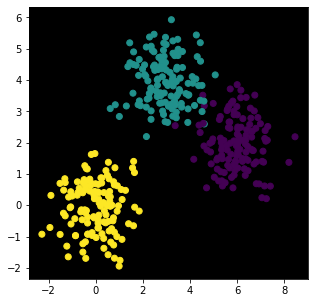

Dataset: twoClusters   Noise: 0.1


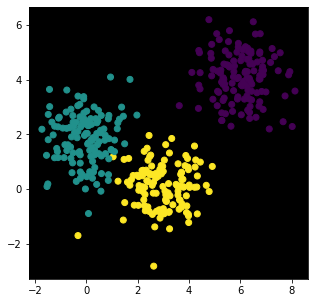

Dataset: twoClusters   Noise: 0.1


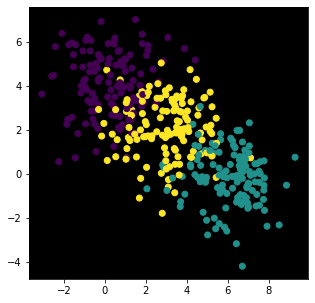

Dataset: twoClusters   Noise: 0.5


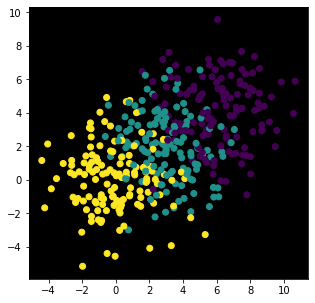

Dataset: twoClusters   Noise: 1


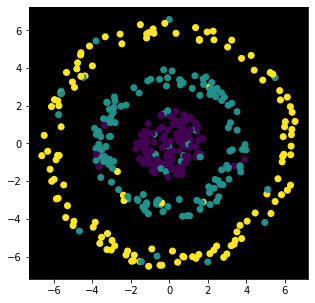

Dataset: circles   Noise: 0.1


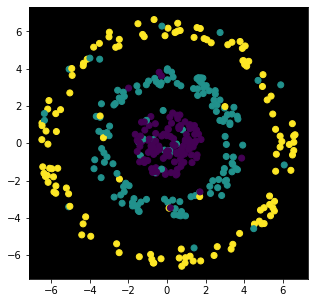

Dataset: circles   Noise: 0.1


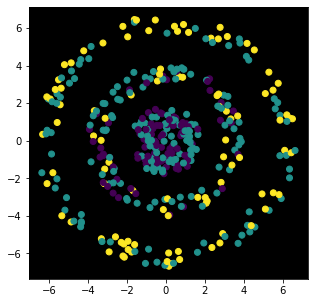

Dataset: circles   Noise: 0.5


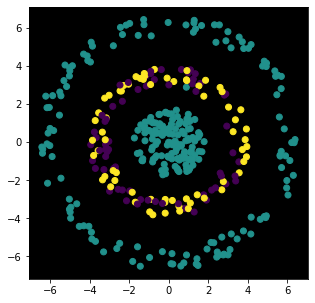

Dataset: circles   Noise: 1


In [671]:
for i in [0.1,0.10,0.50,1]:
  X=generateData(400,'g',i,3,1,'true')
  print('Dataset: twoClusters   Noise:',i)

for i in [0.1,0.10,0.50,1]:
  X=generateData(400,'c',i,3,1,'true')
  print('Dataset: circles   Noise:',i)

Below is a code for plotting decision boundaries

In [0]:
def plot_decision(obj,X,numOutputs):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))
    ar=np.array([xx.ravel(), yy.ravel()])   
    for i in range(numOutputs+1):   # adding column for bias and label for consistency
      ar=np.append(ar,np.zeros((1,ar.shape[1]))+1,axis=0)
    z = obj.predict(ar.T,1)
    z = z[:,0].reshape(xx.shape)
    plt.contourf(xx,yy,z)
    plt.scatter(X[:,0],X[:,1],c=X[:,-1])
    plt.show()

Below is a code for train test split

In [0]:
def train_test_split(data,tr_percent,te_percent):
    n=np.round((data.shape[0] * tr_percent) / 100)
    return data[0:int(n),:],data[int(n):,:]

#train,test=train_test_split(X,60,40)

<h3>(C) Training a feedforward neural network

Functions required for training the model

In [0]:
def active_func(method,z): 
      if method=='relu':
          return np.maximum(0,z)
      if method =="leaky relu":
          return np.maximum(0.01*z,z)  #leaky relu
      if method=='sigmoid':
          return 1/(1+np.exp(-z))
      if method=="tanh":
          return 1
      if method=="softmax":
          # one = np.exp(z)
          # two = np.sum(np.exp(z),axis=1)
          # final=one/two[:,None]
          # return final
          exp_scores = np.exp(z)
          probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)
          return probs
      if method=="linear":
          return 1
def cross_entropy(t,y):
      temp=-t* np.log(y)     
      return temp 
def deriv_activ_fn(method,h):
      if method=='sigmoid':
        return (h * (1 - h))
      if method=="relu":
        return np.where(h>0,1,0)
      if method =="leaky relu":
        return np.maximum(0.01*h,h) 
      if method=="tanh":
        return 1
      if method=="softmax":
        return h * (1 - h)
def check_activation(numOutputs):
      if(numOutputs == 1):
        last_activation = "sigmoid"
      if(numOutputs > 1):
        last_activation = "softmax"
      return last_activation

Train Function

In [0]:
def train(x,numInput,numHiddenUnits,numOutputs,activationType,numIter):
    b1 = np.zeros((1,numHiddenUnits))
    b2 = np.zeros((1,numOutputs))
    learning_rate = 0.1
    last_activation=check_activation(numOutputs)
    # np.random.seed(0)   #seed = 0, for practise
    w1=0.01*np.random.randn(numInput,numHiddenUnits)
    w2=0.01* np.random.randn(numHiddenUnits,numOutputs) 
    for i in range(0,numIter):
        z1=np.dot(x[:,:-numOutputs],w1) + b1
        h1=active_func(activationType,z1) 
        z2=np.dot(h1,w2) + b2
        y=active_func(last_activation,z2)
        t = (x[:,-numOutputs:]).reshape(x.shape[0],numOutputs)
        if(numOutputs==1):
          loss = t-y
          d=deriv_activ_fn(last_activation,y)
          y_ = np.multiply(loss,d)
        else:
          
          m = t.shape[0]
          grad = active_func(last_activation,y)
          t=single_from_one_hot(t)
          grad[range(m),t] -= 1
          grad = grad/m
          
          #loss= y - t
          #d=deriv_activ_fn(last_activation,y)
          y_ = grad
          # #y_ = loss
          # y_=grad
        
        w2_=np.dot(h1.T,y_)
        db2 = np.sum(y_, axis=0, keepdims=True)
        h_=np.dot(y_,w2.T)
        #z_=np.multiply(h_,deriv_activ_fn(activationType,h1))
        w1_ = np.dot(x[:,:-numOutputs].T,h_)
        db1 = np.sum(h_, axis=0, keepdims=True)
        reg = 1e-3
        w2_ += reg * w2_
        w1_ += reg * w1_
        w2 += -learning_rate*w2_
        w1 += -learning_rate*w1_
        db2+= -learning_rate*db2
        db1+= -learning_rate*db1



          # dW2 = np.dot(hidden_layer.T, dscores)
          # db2 = np.sum(dscores, axis=0, keepdims=True)
          # # next backprop into hidden layer
          # dhidden = np.dot(dscores, W2.T)
          # # backprop the ReLU non-linearity
          # dhidden[hidden_layer <= 0] = 0
          # # finally into W,b
          # dW = np.dot(X.T, dhidden)
          # db = np.sum(dhidden, axis=0, keepdims=True)
    return w1,w2

Training now with Data X

In [36]:
c_classes=4
c_numOutputs=4
c_numInputs = 2
c_hiddenUnits = 4
c_iterations = 500
c_numItems = 100
c_noise=0.0

c_activation_type = 'sigmoid'
c_distribution_type = 'g'
verbosity = 1

X=generateData(c_numItems,c_distribution_type,c_noise,c_classes,c_numOutputs,'false')
#X=np.insert(X,c_numInputs,1,axis=1)   #adding extra column for bias ()
X,X_=train_test_split(X,100,0)
w1,w2=train(X,c_numInputs,c_hiddenUnits,c_numOutputs,c_activation_type,c_iterations)
print(w1,w2)

[[ 49.31392266 -84.31835698 -80.1755111   48.95621199]
 [ 34.02270706 -46.03647283 -51.91524712  29.76397751]] [[ 0.44759445  0.48881784 -1.40283965  0.44479063]
 [-0.98551761 -0.73841821  2.68570173 -0.94256933]
 [-0.90262995 -0.82678885  2.59388813 -0.81759426]
 [ 0.45896155  0.41614744 -1.31807319  0.46116981]]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: RuntimeWarning: overflow encountered in exp
  import sys


Predict Function

In [0]:
def predict(x,w1,w2,numInput,numHiddenUnits,numOutputs,activationType,verbosity=0):      
  last_activation=check_activation(numOutputs)
  z1=np.dot(x[:,:-numOutputs],w1)

  if(verbosity>1):
    print('z1:',z1)
  
  h1=active_func(activationType,z1)
  if(verbosity>1):
    print('h1:',h1)
  
  z2=np.dot(h1,w2)
  if(verbosity>1):
    print('z2:',z2)
  
  y=active_func(last_activation,z2)
  if(verbosity>=1):
      print('y:',y)

  if(numOutputs==1):
    loss = x[:,-numOutputs:] - y
    y=np.where(y>=0.5,1.,0.)
    if(verbosity>=1):
      print('loss:',loss)
      
  
  else:
    loss=cross_entropy(x[:,-numOutputs:],y)
    if(verbosity>=1):
      print('loss:',loss)
  ret_array= np.append(y,loss,axis=1)
  return ret_array

def accuracy(y,t):                        #finding accuracy of the model
  y=np.around(y,decimals=1)
  print(y)
  print(t)
  print('training accuracy: %.2f' % (np.mean(y == t)))
  # print(np.around(y,decimals=3))
  # print(t)
  # if(numOutputs==1):
  #   #print(y)
  #   acc = (np.count_nonzero(y-t==0)) / y.shape[0]
  # if(numOutputs>1):
    
  #   y = ret_array[:,:-c_numOutputs]
  #   y=np.argmax(y,axis=1)
  #   #print(y)
  #   t=single_from_one_hot(X[:,-c_numOutputs:])
  #   #print(t)
  #   acc = (np.count_nonzero(y-t==0)) / y.shape[0]
  return 

Predicting values now:

In [38]:
ret_array=predict(X,w1,w2,c_numInputs,c_hiddenUnits,c_numOutputs,c_activation_type,0)
#print(ret_array)

acc=accuracy(ret_array[:,:-c_numOutputs],X[:,-c_numOutputs:])

[[0.3 0.3 0.  0.3]
 [0.3 0.3 0.  0.3]
 [0.3 0.3 0.  0.3]
 [0.3 0.3 0.  0.3]
 [0.1 0.2 0.5 0.1]
 [0.3 0.3 0.  0.3]
 [0.3 0.3 0.  0.3]
 [0.  0.  1.  0. ]
 [0.3 0.3 0.  0.3]
 [0.3 0.3 0.  0.3]
 [0.3 0.3 0.  0.3]
 [0.3 0.3 0.  0.3]
 [0.3 0.3 0.  0.3]
 [0.3 0.3 0.  0.3]
 [0.3 0.3 0.  0.3]
 [0.3 0.3 0.  0.3]
 [0.3 0.3 0.  0.3]
 [0.  0.  1.  0. ]
 [0.3 0.3 0.  0.3]
 [0.  0.  1.  0. ]
 [0.3 0.3 0.  0.3]
 [0.3 0.3 0.  0.3]
 [0.3 0.3 0.  0.3]
 [0.3 0.3 0.  0.3]
 [0.3 0.3 0.  0.3]
 [0.3 0.3 0.  0.3]
 [0.3 0.3 0.  0.3]
 [0.  0.  1.  0. ]
 [0.3 0.3 0.  0.3]
 [0.3 0.3 0.  0.3]
 [0.3 0.3 0.  0.3]
 [0.3 0.3 0.  0.3]
 [0.3 0.3 0.  0.3]
 [0.3 0.3 0.  0.3]
 [0.3 0.3 0.  0.3]
 [0.  0.  1.  0. ]
 [0.3 0.3 0.  0.3]
 [0.3 0.3 0.  0.3]
 [0.3 0.3 0.  0.3]
 [0.3 0.3 0.  0.3]
 [0.3 0.3 0.  0.3]
 [0.1 0.1 0.7 0.1]
 [0.3 0.3 0.  0.3]
 [0.3 0.3 0.  0.3]
 [0.3 0.3 0.  0.3]
 [0.3 0.3 0.  0.3]
 [0.3 0.3 0.  0.3]
 [0.3 0.3 0.  0.3]
 [0.3 0.3 0.  0.3]
 [0.3 0.3 0.  0.3]
 [0.3 0.3 0.  0.3]
 [0.3 0.3 0.  0.3]
 [0.3 0.3 0.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: RuntimeWarning: overflow encountered in exp
  import sys


In [0]:
def plot_for_c(x,w1,w2,numInput,numHiddenUnits,numOutputs,activationType):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))
    ar=np.array([xx.ravel(), yy.ravel()])   
    for i in range(numOutputs):   # adding column for bias and label for consistency
      ar=np.append(ar,np.zeros((1,ar.shape[1]))+1,axis=0)

    z = predict(ar.T,w1,w2,numInput,numHiddenUnits,1,activationType,0)
    print(z)
    z=single_from_one_hot(z)
    print(z[:10])
    print(xx.shape)
    print(z.shape)
    z = z.reshape(xx.shape)
    plt.contourf(xx,yy,z)
    plt.scatter(X[:,0],X[:,1],c=X[:,-1])
    plt.show()

In [40]:
plot_for_c(X,w1,w2,X[:,-numOutputs:].shape[1],4,1,'sigmoid')
print("Weights: \n",w1,w2)
print("\nTrain Accuracy: ",acc)

NameError: ignored

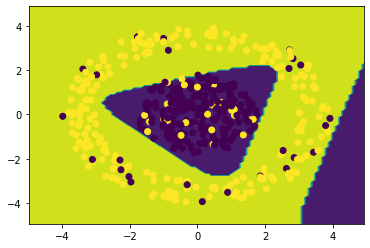

Training Accuracy:  0.9
Activation Function: sigmoid


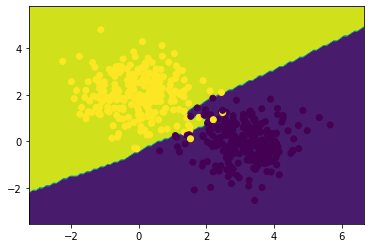

Training Accuracy:  0.99
Activation Function: sigmoid


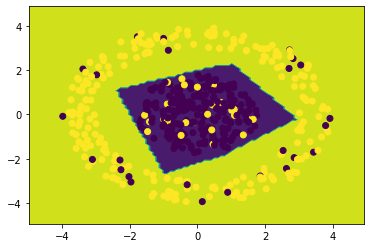

Training Accuracy:  0.9
Activation Function: relu


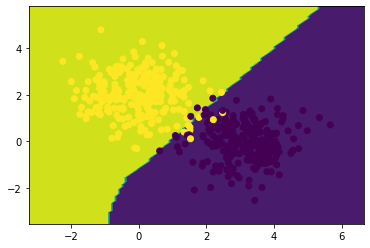

Training Accuracy:  0.976
Activation Function: relu


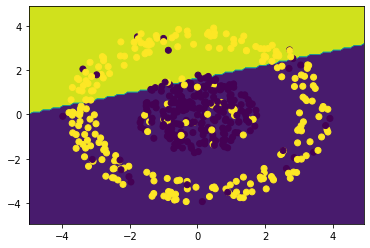

Training Accuracy:  0.658
Activation Function: leaky relu


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: RuntimeWarning: overflow encountered in exp
  import sys


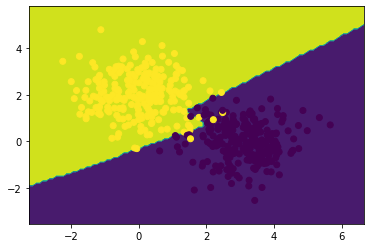

Training Accuracy:  0.99
Activation Function: leaky relu


In [0]:
Y=generateData(500,'c',0.1,2,1,'false')
Z=generateData(500,'g',0.1,2,1,'false')
#numExamples,distributionShape,noise=0,classes=2,numOutputs=1,plotting='false'
#X=generateData(numItems,'c',noise,classes,numOutputs,'false')
#X=np.insert(X,numInputs,1,axis=1)   #adding extra column for bias ()
#X,X_=train_test_split(X,100,0)

for i in ["sigmoid","relu",'leaky relu']:
  for j in [Y,Z]:
    X=np.insert(j,2,1,axis=1)
    w1,w2=net_obj.train(X,3,4,1,i,50000)
    #(x,numInput,numHiddenUnits,numOutputs,activationType,numIter)
    ret_array=net_obj.predict(X,w1,w2,3,4,1,i,1)
    plot_for_c(X,w1,w2,100,4,1,i)
    acc=net_obj.accuracy(ret_array[:,0],X[:,-1])
    print("Training Accuracy: ",acc)
    print("Activation Function:", i)

<h3> (d) Refactoring of the code </h3>

In [0]:
class Model:
  
  def __init__(self,numInput,numOutputs=1,numHiddenUnits=4,layers=4,activationType='S',):

      self.check_activation(numOutputs)
      self.numInput = numInput
      self.numOutputs = numOutputs
      self.numHiddenUnits = numHiddenUnits
      self.activationType = activationType
      self.layers = layers
      self.weight_flag=0

  def setWeights(self,value):
      self.w0=np.zeros((self.numInput,self.numHiddenUnits)) + value
      self.weights_hdn_layers_d=np.zeros((self.layers-1,self.numHiddenUnits,self.numHiddenUnits)) + value
      #1st and last layers weights are never going to be used from this array. just to keep the array size consistent, I have put 0 in their indices.
      self.weights_hdn_layers[0] = 0
      self.weights_hdn_layers[layers-2] = 0
      self.wL=np.zeros((self.numHiddenUnits,self.numOutputs)) + value
      self.weight_flag=1

  def initWeights(self,mean,stdev):
        self.w0 = np.random.normal(mean, stdev, self.numInput* self.numHiddenUnits)
        self.w0=np.reshape(self.w0,(self.numInput,self.numHiddenUnits))

        self.weights_hdn_layers = np.random.normal(mean, stdev, (self.layers-1) * self.numHiddenUnits * self.numHiddenUnits)
        self.weights_hdn_layers=np.reshape(self.weights_hdn_layers,(self.layers-1,self.numHiddenUnits,self.numHiddenUnits))

        self.wL = np.random.normal(mean, stdev, self.numHiddenUnits * self.numOutputs)
        self.wL=np.reshape(self.wL,(self.numHiddenUnits,self.numOutputs))
    
        self.weights_hdn_layers[0] = 0
        self.weights_hdn_layers[layers-2] = 0
        self.weights_assigned = 1
        self.weight_flag=1
  def setInput(self,data):
        self.x=data
  def setTest(self,data):
        self.testData=data
  def initialize_weights(self):
        #W values
        self.w0=np.random.random_sample((self.numInput,self.numHiddenUnits))
        self.weights_hdn_layers=np.random.rand(self.layers-1,self.numHiddenUnits,self.numHiddenUnits)
        #1st and last layers weights are never going to be used from this array. just to keep the array size consistent, I have put 0 in their indices.
        self.weights_hdn_layers[0] = 0
        self.weights_hdn_layers[layers-2] = 0
        self.wL=np.random.random_sample((self.numHiddenUnits,self.numOutputs))

        #wD values
        self.w0_d=np.zeros((self.numInput,self.numHiddenUnits))
        self.weights_hdn_layers_d=np.zeros((self.layers-1,self.numHiddenUnits,self.numHiddenUnits))
        #1st and last layers weights are never going to be used from this array. just to keep the array size consistent, I have put 0 in their indices.
        self.weights_hdn_layers_d[0] = 0
        self.weights_hdn_layers_d[layers-2] = 0
        self.wL_d=np.zeros((self.numHiddenUnits,self.numOutputs)) 

        #H values
        
      
  def active_func(self,method,z):  
        if method=='R':
          return np.maximum(0,z)
        if method =="leaky relu":
          return np.maximum(0.01*z,z)  
        if method=='S':
          return 1/(1+np.exp(-z))
        if method=="SO":
          return np.exp(z) / np.sum(np.exp(z),axis=1,keepdims=True)

  def deriv_activ_fn(self,method,h,t=0):
        if method=='S':
          return (h * (1 - h))
        if method=="R":
          return np.where(h>0,1,0)
        if method =="leaky relu":
          return np.maximum(0.01*h,h) 
        if method=="SO":
          return h * (1 - h)

  def check_activation(self,numOutputs):
      if(numOutputs == 1):
        self.last_activation = "S"
      if(numOutputs > 1):
        self.last_activation = "SO"

  def loss(self,y,t):
      if self.last_activation=='S':
          return 0.5 * np.power((y - t),2)
      if self.last_activation=='SO':
          temp=-(t* np.log(y) + (1-t) * np.log(1 - y))
          return temp

  def deriv_loss(self,y,t):
      if self.last_activation=='S':
          return t - y
      if self.last_activation=="SO":    #cross entropy loss
          temp = t - y
          #temp = -np.sum(t * np.log(y))
          return temp
  
  def cross_entropy(self,t,y):
      temp=t* np.log(y+0.00001) + (1-t) * np.log(1 - y +0.00001)     #0.00001 is added so that log does not give nan or inf
      temp=np.around(temp,decimals=3)
      return temp 

  def train(self,numIter,learning_rate):
      
      #self.initialize_weights()
      if(self.weight_flag==0):
        self.initialize_weights()
      
      self.h_hdn_layers =np.zeros((self.layers-1,self.x.shape[0],self.numHiddenUnits))+1
      self.numIter=numIter
      self.learning_rate = learning_rate
      self.initialize_weights()
      self.train_loss=np.zeros([numIter,self.numOutputs])
      self.test_loss = np.zeros([numIter,self.numOutputs])
      #np.random.seed(0)   #seed = 0, for practise
      for i in range(0,self.numIter):
          #********************feedforward propogation Start *******************#
          for j in range(0,self.layers-1):
            if (j==0):            #first layer
              z0=np.dot(self.x[:,:self.numInput],self.w0) 
              self.h0=self.active_func(self.activationType,z0)
              self.h_hdn_layers[j] = self.h0
            elif(j==self.layers-2):    #last layer
              
              
              zL=np.dot(self.h_hdn_layers[j-1],self.wL)
              
              
              self.hL=self.active_func(self.last_activation,zL)
              self.hL = np.nan_to_num(self.hL)
              
            else:
              zN = np.dot(self.h_hdn_layers[j-1],self.weights_hdn_layers[j])
              self.hN = self.active_func(self.activationType,zN)
              self.h_hdn_layers[j] = self.hN
          self.y = self.hL
          self.t = (self.x[:,-self.numOutputs:]).reshape(self.x.shape[0],self.numOutputs)
          self.l = self.loss(self.y,self.t)
          #******************** feedforward propogation finish *******************#
          
          # if(i%10000==0):
          #   print('***** iteration: ',i,' & loss: ',self.l,' ****')

          self.train_loss[i]=np.sum(self.l)                     #train error finding for each iteration
          self.test_loss[i]=np.sum(self.test(self.testData))    #test error finding for each iteration
          self.der_loss = self.deriv_loss(self.y,self.t)

          #******************** backpropogation start *******************#
          for k in range(self.layers-2,-1,-1):   # for example: for 4 layers , layer(2,1,0) as layer 3 would be the output at that point
              # last layer backprop
              if ( k == self.layers-2):  
                  self.d_ = self.deriv_activ_fn(self.last_activation,self.hL)
                  self.y_=np.multiply(self.der_loss,self.d_)
                  self.wL_d= np.dot(self.h_hdn_layers[k-1].T,self.y_)
                  self.wn_= np.dot(self.y_,self.wL.T)
              # first layer backprop
              elif k == 0:         
                    self.h_=np.multiply(self.wn_,self.deriv_activ_fn(self.activationType,self.h_hdn_layers[k]))
                    self.w0_d = np.dot(self.x[:,:-self.numOutputs].T,self.h_)
              # middle layers backprop
              else:                
                    self.h_=np.multiply(self.wn_,self.deriv_activ_fn(self.activationType,self.h_hdn_layers[k]))
                    self.weights_hdn_layers_d[k] = np.dot(self.h_hdn_layers[k-1].T,self.h_)
                    self.wn_= np.dot(self.wn_,self.weights_hdn_layers_d[k].T)
              #adding gradients
              self.weights_hdn_layers = self.weights_hdn_layers + self.learning_rate*self.weights_hdn_layers_d
              self.w0 += self.learning_rate*self.w0_d
              self.wL += self.learning_rate*self.wL_d
          #******************** backpropogation finish *******************#  
      return np.concatenate((self.train_loss,self.test_loss),axis=1)
  def test(self,x):    
        self.p = x
        t = self.p[:,-self.numOutputs]
        
        h_hdn_layers =np.zeros((self.layers-1,self.p.shape[0],self.numHiddenUnits))+1
        for j in range(0,self.layers-1):
            if (j==0):            #first layer
              z0=np.dot(self.p[:,:-self.numOutputs],self.w0) 
              h0=self.active_func(self.activationType,z0)
              h_hdn_layers[j] = h0
            elif(j==self.layers-2):    #last layer
              zL=np.dot(h_hdn_layers[j-1],self.wL)
              hL=self.active_func(self.last_activation,zL)
            else:
              zN = np.dot(self.h_hdn_layers[j-1],self.weights_hdn_layers[j])
              hN = self.active_func(self.activationType,zN)
              h_hdn_layers[j] = hN
        y = hL
        return self.loss(y,t)
  def predict(self,verbosity):     
        for j in range(0,self.layers-1):
            if (j==0):            #first layer
              z0=np.dot(self.x[:,:self.numInput],self.w0) 
              self.h0=self.active_func(self.activationType,z0)
              self.h_hdn_layers[j] = self.h0
            elif(j==self.layers-2):    #last layer
              zL=np.dot(self.h_hdn_layers[j-1],self.wL)
              self.hL=self.active_func(self.last_activation,zL)
            else:
              zN = np.dot(self.h_hdn_layers[j-1],self.weights_hdn_layers[j])
              self.hN = self.active_func(self.activationType,zN)
              self.h_hdn_layers[j] = self.hN
        y = self.hL
        y=np.around(self.y,decimals = 2)  # rounding up
        if (self.numOutputs==1): y=np.where(y>0.5,1.,0.)      #setting threshold
        cr_entropy=self.loss(self.x[:,-self.numOutputs:],y)   #finding cross entropy
        ret_array= np.append(y,cr_entropy,axis=1)
        print("Labels:\n",self.x[:,-self.numOutputs:])
        return ret_array
  def plot(self,x,numOutputs):
      x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
      y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
      xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))
      ar=np.array([xx.ravel(), yy.ravel()])   
      for i in range(numOutputs+1):   # adding column for bias and label for consistency
        ar=np.append(ar,np.zeros((1,ar.shape[1]))+1,axis=0)

      self.x = ar.T
      self.h_hdn_layers =np.zeros((self.layers-1,self.x.shape[0],self.numHiddenUnits))+1
      for j in range(0,self.layers-1):
          if (j==0):            #first layer
            z0=np.dot(self.x[:,-self.numOutputs:],self.w0) 
            self.h0=self.active_func(self.activationType,z0)
            self.h_hdn_layers[j] = self.h0
          elif(j==self.layers-2):    #last layer
            zL=np.dot(self.h_hdn_layers[j-1],self.wL)
            self.hL=self.active_func(self.last_activation,zL)
          else:
            zN = np.dot(self.h_hdn_layers[j-1],self.weights_hdn_layers[j])
            self.hN = self.active_func(self.activationType,zN)
            self.h_hdn_layers[j] = self.hN
      z = self.hL
      z = z[:,0].reshape(xx.shape)
      plt.contourf(xx,yy,z)
      plt.scatter(X[:,0],X[:,1],c=X[:,-1])
      plt.show()

  def accuracy(self,y,t):                        #finding accuracy of the model 
    acc = (np.count_nonzero((y-t)==0)) / y.shape[0]
    return acc

In [0]:
classes=2
numOutputs=1
numInputs = 2
hiddenUnits = 4
layers = 1
iterations = 500
numItems = 20
noise=0
learning_rate = 0.1

activation_func = 'R'
distribution_type = 'g'
verbosity = 1

X=generateData(numItems,distribution_type,noise,classes,numOutputs,'false')
X=np.insert(X,numInputs,1,axis=1)   #adding extra column for bias ()
X_Train,X_Test=train_test_split(X,100,0)   # creating train and test split data

s=time.time()
net = Model(numInputs+1,numOutputs,hiddenUnits,layers+2,activation_func)
net.setInput(X_Train)
net.setTest(X_Test)
net.initWeights(2,2)
loss=net.train(iterations,learning_rate)
print('(Train loss, Test loss):\n',loss)
ret_array1=net.predict(X_Test)
print('Predicted value + cross entropy:\n',ret_array1)
t=time.time()
print('Time taken: ',t-s)  # time for the algorithm
acc1=net.accuracy(ret_array1[:,0],X[:,-numOutputs])
print("accuracy: ",acc1)


(Train loss, Test loss):
 [[4.89956849e+00 0.00000000e+00]
 [4.85908629e+00 0.00000000e+00]
 [4.75661769e+00 0.00000000e+00]
 [4.50908197e+00 0.00000000e+00]
 [3.76561487e+00 0.00000000e+00]
 [2.08943518e+00 0.00000000e+00]
 [1.77113606e+00 0.00000000e+00]
 [1.32909274e+00 0.00000000e+00]
 [8.55089209e-01 0.00000000e+00]
 [5.55421639e-01 0.00000000e+00]
 [3.92014244e-01 0.00000000e+00]
 [3.03936990e-01 0.00000000e+00]
 [2.52695236e-01 0.00000000e+00]
 [2.18963676e-01 0.00000000e+00]
 [1.94765082e-01 0.00000000e+00]
 [1.76318822e-01 0.00000000e+00]
 [1.61666920e-01 0.00000000e+00]
 [1.49674770e-01 0.00000000e+00]
 [1.39627006e-01 0.00000000e+00]
 [1.31051810e-01 0.00000000e+00]
 [1.23606444e-01 0.00000000e+00]
 [1.17051731e-01 0.00000000e+00]
 [1.11218455e-01 0.00000000e+00]
 [1.05979626e-01 0.00000000e+00]
 [1.01237810e-01 0.00000000e+00]
 [9.69164240e-02 0.00000000e+00]
 [9.29547930e-02 0.00000000e+00]
 [8.93042815e-02 0.00000000e+00]
 [8.59252604e-02 0.00000000e+00]
 [8.27850676e-02 

In [0]:
classes=2
numOutputs=1
numInputs = 2
hiddenUnits = 5
layers = 2
iterations = 50000
numItems = 20
noise=0
learning_rate = 0.1
X=generateData(numItems,distribution_type,noise,classes,numOutputs,'false')
X=np.insert(X,numInputs,1,axis=1)   #adding extra column for bias ()
acc1=net.accuracy(ret_array1[:,0],X[:,-numOutputs])
print("accuracy: ",acc1)

accuracy:  0.3


In [0]:
n=Model(2,1,5,2,'R')
n.setInput(X)

loss=net.train(iterations,learning_rate)
print('(Train loss, Test loss):\n',loss)
ret_array1=net.predict(X_Test)
print('Predicted value + cross entropy:\n',ret_array1)

(Train loss, Test loss):
 [[4.65573459e+00 0.00000000e+00]
 [4.28307685e+00 0.00000000e+00]
 [3.03370872e+00 0.00000000e+00]
 ...
 [8.18586881e-06 0.00000000e+00]
 [8.18568636e-06 0.00000000e+00]
 [8.18550392e-06 0.00000000e+00]]
Labels:
 [[1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [0.]]
Predicted value + cross entropy:
 [[1. 0.]
 [1. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [1. 0.]
 [0. 0.]
 [1. 0.]
 [0. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 0.]]


In [0]:
n=Model(2,1,5,2,'R')
n.setInput(X)

loss=net.train(iterations,learning_rate)
print('(Train loss, Test loss):\n',loss)
ret_array1=net.predict(X_Test)
print('Predicted value + cross entropy:\n',ret_array1)
acc1=net.accuracy(ret_array1[:,0],X[:,-numOutputs])
print("accuracy: ",acc1)

(Train loss, Test loss):
 [[4.92380375e+00 0.00000000e+00]
 [4.84520343e+00 0.00000000e+00]
 [4.54265948e+00 0.00000000e+00]
 ...
 [8.20529087e-06 0.00000000e+00]
 [8.20510787e-06 0.00000000e+00]
 [8.20492488e-06 0.00000000e+00]]
Labels:
 [[1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [0.]]
Predicted value + cross entropy:
 [[1. 0.]
 [1. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [1. 0.]
 [0. 0.]
 [1. 0.]
 [0. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 0.]]
accuracy:  0.3


In [0]:
n=Model(2,1,2,5,'R')
n.setInput(X)

loss=net.train(iterations,learning_rate)
print('(Train loss, Test loss):\n',loss)
ret_array1=net.predict(X_Test)
print('Predicted value + cross entropy:\n',ret_array1)
acc1=net.accuracy(ret_array1[:,0],X[:,-numOutputs])
print("accuracy: ",acc1)

(Train loss, Test loss):
 [[4.97682328e+00 0.00000000e+00]
 [4.97391262e+00 0.00000000e+00]
 [4.96919526e+00 0.00000000e+00]
 ...
 [8.25181377e-06 0.00000000e+00]
 [8.25162778e-06 0.00000000e+00]
 [8.25144180e-06 0.00000000e+00]]
Labels:
 [[1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [0.]]
Predicted value + cross entropy:
 [[1. 0.]
 [1. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [1. 0.]
 [0. 0.]
 [1. 0.]
 [0. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 0.]]
accuracy:  0.3
